# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



<a id="point0"></a>

**Оглавление:**
* [1 Общая информация о данных](#Откройте-таблицу-и-изучите-общую-информацию-о-данных)
* [2 Предобработка данных](#Предобработка-данных)
  * [2.1 Удаление пропусков](#Удаление-пропусков)
  * [2.2 Обработка аномальных значений](#Обработка-аномальных-значений)
  * [2.3 Удаление пропусков (продолжение)](#Удаление-пропусков-(продолжение))
  * [2.4 Изменение типов данных](#Изменение-типов-данных)
  * [2.5 Обработка дубликатов](#Обработка-дубликатов)
  * [2.6 Категоризация данных](#Категоризация-данных)
  * [2.7 Исследование данных и ответы на вопросы](#Шаг-3.-Исследуйте-данные-и-ответьте-на-вопросы)
    * [2.7.1 Зависимость между количеством детей и возвратом кредита в срок](#3.1-Есть-ли-зависимость-между-количеством-детей-и-возвратом-кредита-в-срок?)
    * [2.7.2 Зависимость между семейным положением и возвратом кредита в срок](#3.2-Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?)
    * [2.7.3 Зависимость между уровнем дохода и возвратом кредита в срок](#3.3-Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?)
    * [2.7.4 Как разные цели кредита влияют на его возврат в срок](#3.4-Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?)
    * [2.7.5 Возможные причины появления пропусков в исходных данных.](#3.5-Приведите-возможные-причины-появления-пропусков-в-исходных-данных.)
    * [2.7.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.](#3.6-Объясните,-почему-заполнить-пропуски-медианным-значением-—-лучшее-решение-для-количественных-переменных.)
  * [2.8 Общий вывод.](#Шаг-4:-общий-вывод.)

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<a class="anchor" id="2"></a>

## Предобработка данных

[Вернуться к оглавлению](#point0)

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

[Вернуться к оглавлению](#point0)

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

[Вернуться к оглавлению](#point0)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

[Вернуться к оглавлению](#point0)

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

[Вернуться к оглавлению](#point0)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

[Вернуться к оглавлению](#point0)

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

[Вернуться к оглавлению](#point0)

### Шаг 3. Исследуйте данные и ответьте на вопросы

Для исследования влияния определенного фактора заемщика на количество задолженностей необходимо определить какую долю составляет количество просрочек среди данной группы от общего числа кредитов.

Поскольку исследование проводится для нескольких факторов: *количество детей*, *семейное положение*, *уровень дохода*, *цель кредита* - с целью исключения однотипных операций, представление данных для анализа предпочтительно осуществить с помощью функции.

In [22]:
def ratio(factor): # функция ratio принимает в качестве аргумента factor - один из факторов исследования
    # в теле функции создается сводная таблица pt
    # на основе данных 'debt' с помощью функций 'sum','count' формируем столбцы
    # с количеством просрочек и общему числу займов
    df = data.pivot_table(index = [factor], values='debt', aggfunc = ('sum', 'count'))
    
    # добавляем столб с процентом просрочек (%), округляем до сотых
    df['ratio'] = round(100 * df['sum'] / df['count'], 2) 
    return df

[Вернуться к оглавлению](#point0)

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Для анализа зависимости между количеством детей и возвратом кредита в срок исследуем наши данные по столбцу `'children'`.

In [23]:
# применим функцию ratio для аргумента children
factor_children = ratio('children')
factor_children

,count,sum,ratio
children,,,
0,14091,1063,7.54
1,4808,444,9.23
2,2052,194,9.45
3,330,27,8.18
4,41,4,9.76
5,9,0,0.00


Из представленных выше данных видно, что для заемщиков с количеством детей равным 5 количество просрочек равно 0. Однако, следует учесть, что выборка этой группы состоит всего из 9 человек, что значительно меньше значений из других групп. Для проведения анализа следует исключить эту подгруппу.

Перезапишем датафрейм `factor_children` введя условие о включении в него только подгрупп размером более 10.

In [24]:
factor_children = factor_children.loc[factor_children.loc[:,'count'] > 10]
factor_children

,count,sum,ratio
children,,,
0,14091,1063,7.54
1,4808,444,9.23
2,2052,194,9.45
3,330,27,8.18
4,41,4,9.76


Для более наглядного представления можно представить данные в виде столбчатой диаграммы.

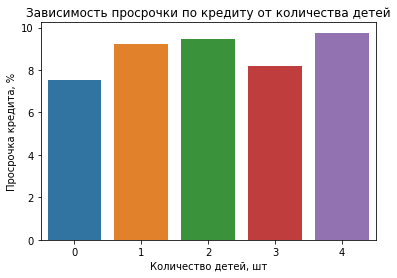

In [25]:
import seaborn # импортируем библиотеку seaborn для построения диаграмм

x = factor_children.index.tolist() # задаем значения по оси x
y = factor_children['ratio'] # задаем значения по оси y

# строим диаграмму
seaborn.barplot(x=x, y=y).set(xlabel='Количество детей, шт', 
                              ylabel='Просрочка кредита, %', 
                              title='Зависимость просрочки по кредиту от количества детей');

**Вывод:** 
1. Количество просрочек по кредиту среди бездетных заемщиков ниже, чем у заемщиков с детьми
2. На основании имеющихся данных нельзя определенно утвержать, что *количество детей* влияет на возврат кредита в срок. Хотя данные иллюстрируют небольшое повышение доли просрочек с увеличением количества детей, но в то же время размер выборки в этом направлении уменьшается, что может влиять на точность результата.

[Вернуться к оглавлению](#point0)

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Для поиска зависимости между семейным положением и возвратом кредита в срок исследуем наши данные по столбцу `'family_status'`.

In [26]:
# применим функцию ratio для аргумента family_status,
factor_family_status = ratio('family_status').sort_values(by='ratio') # отсортируем данные по столбцу ratio
factor_family_status

,count,sum,ratio
family_status,,,
вдовец / вдова,951,63,6.62
в разводе,1189,84,7.06
женат / замужем,12261,927,7.56
гражданский брак,4134,385,9.31
Не женат / не замужем,2796,273,9.76


Представим данные в виде столбчатой диаграммы.

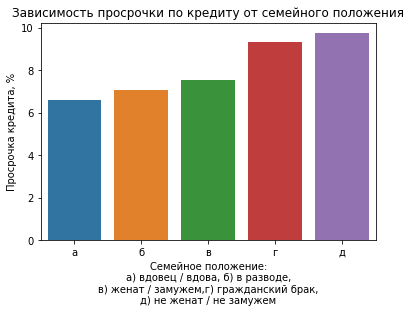

In [27]:
# задаем значения по оси x
x = ['а', 'б', 'в', 'г', 'д']
y = factor_family_status['ratio'] # задаем значения по оси y

# строим диаграмму
xlabel='Семейное положение:\nа) вдовец / вдова, б) в разводе,\nв) женат / замужем,' + \
       'г) гражданский брак,\nд) не женат / не замужем'

seaborn.barplot(x=x, y=y).set(xlabel=xlabel, 
                              ylabel='Просрочка кредита, %', 
                              title='Зависимость просрочки по кредиту от семейного положения');

**Вывод:** на основе имеющихся данных, можно сделать вывод, что *семейное положение* оказывает влияние на возврат кредита в срок. Заемщики со статусами "Не женат / не замужем" и "гражданский брак" относятся к категории с более высокой долей просрочки. Заемщики со статусами "вдовец / вдова", "в разводе", "женат / замужем" имеют менее низкий процент просрочек по кредиту.

[Вернуться к оглавлению](#point0)

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Для поиска зависимости между уровнем дохода и возвратом кредита в срок исследуем данные по столбцу `'total_income_category'`.

In [28]:
# применим функцию ratio для аргумента total_income_category,
factor_income = ratio('total_income_category')
factor_income

,count,sum,ratio
total_income_category,,,
A,25,2,8.00
B,5014,354,7.06
C,15921,1353,8.50
D,349,21,6.02
E,22,2,9.09


Из представленных выше данных видно, что самая большая доля просрочек у заемщиков с категорией дохода `'E'` (доход 0–30000 руб). Однако, выборки для категорий доходов `'A'` и `'E'` по численности значительно ниже, чем у других категорий. Исследуем данные исключив данные категории.

In [29]:
factor_income = factor_income.loc[factor_income.loc[:, 'count'] > 25]
factor_income

,count,sum,ratio
total_income_category,,,
B,5014,354,7.06
C,15921,1353,8.50
D,349,21,6.02


Представим данные в виде столбчатой диаграммы.

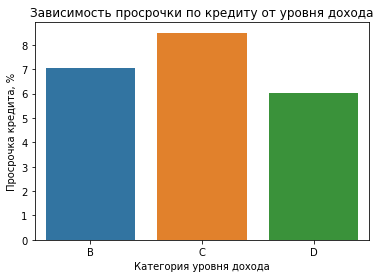

In [30]:
x = factor_income.index.tolist() # задаем значения по оси x
y = factor_income['ratio'] # задаем значения по оси y

# строим диаграмму
seaborn.barplot(x=x, y=y).set(xlabel='Категория уровня дохода', 
                              ylabel='Просрочка кредита, %', 
                              title='Зависимость просрочки по кредиту от уровня дохода');

**Вывод:** на основе имеющихся данных, можно сделать вывод, что *уровень дохода* влияет на возврат кредита в срок. Заемщики категории `'C'` (доход 50001–200000 руб) имеют самый высокий процент просрочек среди группы. Заемщики категорий `'B'` (доход 200001–1000000 руб) и `'D'` (доход 30001–50000 руб) имеют процент просрочки кредита несколько ниже. Вместе с тем, следует учесть, что выборки последних категорий также меньше, что может влиять на точность результата. 

[Вернуться к оглавлению](#point0)

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Для поиска зависимости между целью кредита и долей просрочек исследуем данные по столбцу `'purpose_category'`.

In [31]:
# применим функцию ratio для аргумента purpose_category
factor_purpose = ratio('purpose_category').sort_values(by='ratio') # отсортируем данные по столбцу ratio
factor_purpose

,count,sum,ratio
purpose_category,,,
операции с недвижимостью,10751,780,7.26
проведение свадьбы,2313,183,7.91
получение образования,3988,369,9.25
операции с автомобилем,4279,400,9.35


Представим данные в виде столбчатой диаграммы.

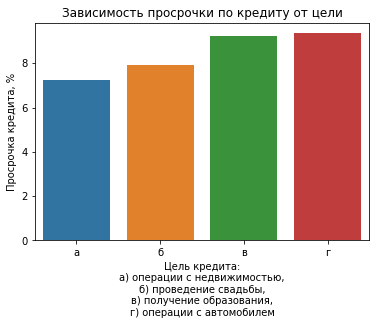

In [32]:
x = ['а', 'б', 'в', 'г']
y = factor_purpose['ratio'] # задаем значения по оси y

# строим диаграмму
xlabel='Цель кредита:\nа) операции с недвижимостью,\nб) проведение свадьбы,\n' + \
       'в) получение образования,\nг) операции с автомобилем'

seaborn.barplot(x=x, y=y).set(xlabel=xlabel, 
                              ylabel='Просрочка кредита, %', 
                              title='Зависимость просрочки по кредиту от цели');

**Вывод:** на основе имеющихся данных, можно сделать вывод, что *цели кредита* влияют на возврат кредита в срок. К категории с более высокой долей просрочек относятся кредиты с целями "получение образования" и "операции с автомобилем". Цели кредита "проведение свадьбы" и "операции с недвижимостью" можно отнести к менее рискованным, причем, последняя подкатегория имеет самую низкую долю просрочек из всей исследуемой группы.

[Вернуться к оглавлению](#point0)

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* При предварительной обработке данных были выявлены пропуски для следующих категорий `days_employed` (общий трудовой стаж в днях) и `total_income` (ежемесячный доход). Эти данные критически важны для получения кредита, поэтому предположить, что заемщик намеренно не сообщил эти данные нельзя.

То, что при предобработке выявилось одинаковое количество пропусков (2174) для двух категорий говорит о некой системности ошибки.

Проблема с данным, которая в итоге привела к пустым значениям, могла появится на этапе занесения информации сотрудником, либо при дальнейшей обработке и хранении информации.
<hr> 

*Ответ 2:* При предварительной обработке данных были выявлены пропуски для следующих категорий `days_employed` (общий трудовой стаж в днях) и `total_income` (ежемесячный доход). Эти данные критически важны для получения кредита, поэтому предположить, что заемщик намеренно не сообщил эти данные нельзя.

То, что при предобработке выявилось одинаковое количество пропусков (2174) для двух категорий говорит о некой системности ошибки.

Пропуски в данных могут возникнуть на этапе внесения, обработки и хранения информации.

То, что пропущенные значения ожидаемого типа (имеют формат `NaN`), и тот факт, что из всего набора данных пропуски имеются только в двух столбцах, говорит не в пользу того, что файл с данными мог быть поврежден.
Поэтому, наиболее вероятно, что пропуски возникли на этапе ввода или обработки информации. Иными словами, сотрудник мог намеренно не внести эти данные. Либо, сотрудник указал данные, но в силу каких-либо обстоятельств (например, программной ошибки или программной особенности) данные не были внесены в базу информации. 

Пропуски выявлены среди следующих категорий заемщиков: 'пенсионер', 'госслужащий', 'компаньон', 'сотрудник',  'предприниматель'. И если для некоторых категорий, например 'неработающий пенсионер' отсутствие данной информации можно логически объяснить, для других категорий выявить какую-либо закономерность не удается.

Если бы была доступна информация о времени и месте выдачи кредита, то можно было провести дополнительный анализ, попытаться обобщить данные и установить точную причину появления пропусков.


[Вернуться к оглавлению](#point0)

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* при выявлении в исследуемых данных пропусков можно решить проблему различными путями. 
* **Оставить данные как есть**. Если категория данных с пропусками не подлежит анализу, то такой метод можно применить.
* **Удалить строки с пропусками**. В нашем случае это бы привело к потере 10% данных, что весьма ощутимо.
* **Заполнить пропуски данными**:
* * **Заполнить пропуски нулями**. Такой метод может исказить общую картину данных. В нашем случае эти значения не могут быть нулями, потому что являются критериями для выдачи кредита.
  * **Заполнить пропуски средним значением** по диапазону. При выборе этого метода следует учитывать, что среднее значение некорректно характеризует данные, когда некоторые значения сильно выделяются среди большинства. В нашем случае мы имели дело с категориями `days_employed` (общий трудовой стаж в днях) и `total_income` (ежемесячный доход). Данные такого типа могут лежать в широком диапазоне и иметь пиковые значения.
  * **Заполнить пропуски медианным значением**. Данный метод приводит к наименьшему искажению данных при заполнении пропусков для количественных переменных, поэтому его и использовали.
<hr>

*Ответ 2:* Медиана более корректно характеризует данные, когда некоторые значения диапазона сильно выделяются среди большинства. 

Если в датасете есть очень большие или очень маленькие значения, которые сильно отличаются от остальных, то они могут значительно повлиять на среднее значение. Медиана же будет менее подвержена влиянию таких выбросов.


Поэтому заполнить пропуски медианным значением — лучшее решение для количественных переменных.

[Вернуться к оглавлению](#point0)

### Шаг 4: общий вывод.

В рамках проектной работы "Исследование надёжности заёмщиков" по заданию заказчика (кредитного отдела банка) был исследован массив данных с целью нахождения закономерностей влияния различных факторов заемщиков на факт погашения кредита в срок.

Перед процессом анализа была проведена предобработка данных:
* выявлены и устранены пропуски
* устранены аномальные значения данных
* данные приведены к необходимому для анализа типу
* выявлены и устранены дубликаты
* данные дополнительно категоризированы с целью повышения информативности.

Анализ данных показал следующие результаты:
1. Установлено, заемщики у которых нет детей имеют более низкую долю просрочек по займам, по сравнению с заемщиками, у которых есть дети. Но установить явную закономерность между количеством детей и процентом просрочек на основе имеющихся данных не удалось.
2. Семейное положение влияет на факт погашения кредита в срок: категории с самой высокой долей просрочки “Не женат / не замужем”, а с самой низкой “вдовец / вдова”
3. Уровень дохода влияет на возврат кредита в срок. Заемщики категории 'C'  с доходом 50001–200000 руб имеют самый высокий процент просрочек среди группы.
4. Цели займа также влияют на долю задолженности по кредиту: К категории с высокой долей просрочек относятся кредиты с целью "получение образования" и "операции с автомобилем", а в категории "операции с недвижимостью" - самый низкий процент просрочек.

Результаты данного исследования могут быть учтены при построении модели кредитного скоринга.

[Вернуться к оглавлению](#point0)